## Dacon의 Baseline을 이용해서 모델링을 진행해 봅니다. 

In [1]:
import os ; os.chdir("../")
from src.data.data_eda import train_test_reader, check_missing_col,make_label_map, label_encoder
train, test = train_test_reader()

# 데이터의 최상단 5 줄을 표시합니다.
train.head()

train data set은 11 개의 feature를 가진 1015 개의 데이터 샘플로 이루어져 있습니다.
test data set은 10 개의 feature를 가진 436 개의 데이터 샘플로 이루어져 있습니다.


,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


### 결측치 확인 

결측치 (NA: Not Available)란 값이 누락된 데이터를 의미합니다. 보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절하게 처리해줘야 합니다. 이번 데이터에 결측치가 있는지 확인해 보겠습니다.

In [2]:
check_missing_col(train)

결측치가 존재하지 않습니다.


[]

중고차 가격 예측을 하기 위한 데이터는 결측치가 존재하지 않은 것으로 확인할 수 있습니다. 

### 데이터 전처리

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1015 non-null   int64 
 1   title         1015 non-null   object
 2   odometer      1015 non-null   int64 
 3   location      1015 non-null   object
 4   isimported    1015 non-null   object
 5   engine        1015 non-null   object
 6   transmission  1015 non-null   object
 7   fuel          1015 non-null   object
 8   paint         1015 non-null   object
 9   year          1015 non-null   int64 
 10  target        1015 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 87.4+ KB


'Label Encoding' 을 통해서 문자형을 숫자 값으로 변환해보겠습니다.

Label Encoding이란, 범주형 변수의 문자열을 수치형으로 변환하는 방법 중 하나입니다.

우리 데이터에는 문자로 이루어진 피쳐를 Label Encoding을 통해 숫자형으로 표현해보겠습니다

In [2]:
le = make_label_map(train)
train = label_encoder(train,le)
train.head()

{'title': {'unknown': 0, 'Toyota RAV 4': 1, 'Toyota Land Cruiser': 2, 'Land Rover Range Rover Evoque': 3, 'Lexus ES 350': 4, 'Toyota Venza': 5, 'Toyota Corolla': 6, 'Land Rover Range Rover Sport': 7, 'Pontiac Vibe': 8, 'Toyota Tacoma': 9, 'Lexus RX 350': 10, 'Ford Escape': 11, 'Honda Civic': 12, 'Volvo XC90': 13, 'BMW 750': 14, 'Infiniti JX': 15, 'Honda Accord': 16, 'Mercedes-Benz ML 350': 17, 'Toyota Camry': 18, 'Hyundai Azera': 19, 'Lexus GX 460': 20, 'BMW 325': 21, 'Toyota Sienna': 22, 'Honda Fit': 23, 'Honda CR-V': 24, 'Hyundai Tucson': 25, 'Ford Transit': 26, 'Jaguar XJ8': 27, 'BMW X6': 28, 'Mercedes-Benz C 300': 29, 'Mitsubishi Galant': 30, 'Mercedes-Benz GL 450': 31, 'Lexus RX 300': 32, 'Toyota Highlander': 33, 'Mitsubishi CANTER PICK UP': 34, 'Nissan Titan': 35, 'Lexus IS 250': 36, 'Mercedes-Benz 200': 37, 'Toyota Sequoia': 38, 'Ford Explorer': 39, 'Hyundai ix35': 40, 'Mack CH613 CONVENTIONAL CAB': 41, 'Lexus CT 200h': 42, 'Lexus LX 570': 43, 'Toyota Avensis': 44, 'Toyota 4-Run

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,1,18277,1,1,1,1,1,1,2016,13665000
1,1,2,10,2,2,1,1,1,2,2019,33015000
2,2,3,83091,2,1,2,1,1,1,2012,9915000
3,3,4,91524,2,1,1,1,1,3,2007,3815000
4,4,5,94177,2,1,2,1,1,1,2010,7385000


### 모델링

변수 정의 

이제 본격적으로 모델을 설계하기 위해 데이터를 독립변수 (X)와 종속변수(y)로 나누어 줍니다. 

우리의 목적은 주어진 중고차 시장 데이터를 이용하여 자동차 가격(target)을 예측하는 것입니다. 

그럼 가격을 제외한 중고차 시장 데이터가 X, 중고차 가격(target)이 y가 되겠죠? 

In [3]:
X = train.drop(['id','target'],axis=1)
y = train.target

In [8]:
from sklearn.model_selection import train_test_split 

data = train.drop("id",axis=1).copy()
train_data, val_data = train_test_split(data, test_size=0.25) #25프로로 설정
train_data.reset_index(inplace=True) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val_data.reset_index(inplace=True)

In [9]:
train_data_X = train_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
train_data_y = train_data.target #training 데이터에서 target 추출

val_data_X = val_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
val_data_y = val_data.target #validation 데이터에서 target 추출

In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # 모델 정의
model.fit(train_data_X, train_data_y) # 학습

RandomForestRegressor()

In [11]:

import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    
    return score

y_hat = model.predict(val_data_X) # y예측
print(f'모델 NMAE: {nmae(val_data_y,y_hat)}')

모델 NMAE: 0.43415097327733143


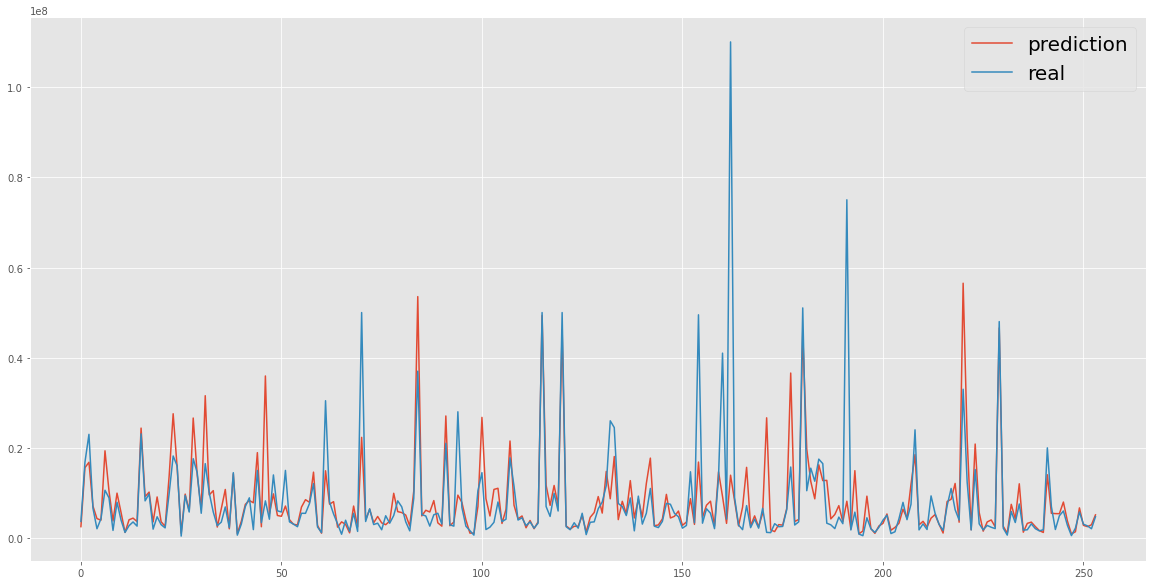

In [12]:
import matplotlib.pyplot as plt 

plt.style.use("ggplot")
plt.figure(figsize= [20,10])
plt.plot(y_hat,label = "prediction")
plt.plot(val_data_y,label = "real")
plt.legend(fontsize=20)
plt.show()

In [13]:
check_missing_col(test) # 결측치 확인

test = test.drop('id', axis = 1) #분석에 필요없는 열 삭제

test = label_encoder(test, le) #범주형 피쳐 라벨인코딩

test.head()

결측치가 존재하지 않습니다.


,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,29.0,1234,3.0,2,1.0,1,1,4.0,2017
1,16.0,29938,3.0,1,1.0,1,1,4.0,2013
2,0.0,87501,2.0,1,1.0,1,1,2.0,2012
3,22.0,180894,2.0,3,2.0,1,1,10.0,2001
4,85.0,104814,2.0,1,1.0,1,1,4.0,2000


In [14]:
y_pred = model.predict(test)

In [16]:
import pandas as pd
submission = pd.read_csv("./data/raw/sample_submission.csv")
submission['target'] = y_pred

In [18]:
submission.to_csv("models/submit1_random_forest_no_preprocess.csv",index=False)